In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

# python display
from IPython.display import HTML, display_html, display

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *
from explore import *
from model import *

In [2]:
df, revert_key, replace_key  = wrangle_data()

In [3]:
df.head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006,0,1,0,0
1,101224,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981,0,1,0,0
2,101437,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,"<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871,1,2,0,0
3,102130,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058,0,1,0,0
4,103094,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,"<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465,0,1,0,0


In [4]:
o = generate_and_return_obj(df)

In [5]:
o.X_train_dummies

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,registered_to_vote_You are NOT registered to vote at your current address,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
1859,201801113305,3.057078,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
96,191336,0.433484,0,0,0,1,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
420,668019,2.413983,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1424,201801054651,0.362586,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
114,200943,0.303046,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,201501605240,2.336849,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
957,201701615366,0.553714,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
239,333639,1.368277,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1795,201801105856,1.338218,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Now we will begin building our functions for modeling

## DataFrame for Storing the Results of the Models

In [6]:
# create dataframe to store the scores
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])

## Get Baseline Accuracy

In [7]:
#PHP is the baseline prediction
print(f'Baseline Accuracy: {(1.00 - round(o.y_train_dummies.mean(), 4))* 100}%')

Baseline Accuracy: 55.75%


## Import Models and Get Model List

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

In [8]:
tree_list, tree_model_name_list = decision_tree_models(10)

In [9]:
#Append results to score_df
for model, name in zip(tree_list, tree_model_name_list):
    score_df = test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [10]:
score_df

,model_name,train_score,validate_score
0,decision_tree_depth_3,0.750710,0.731788
1,decision_tree_depth_4,0.778409,0.730132
2,decision_tree_depth_5,0.794744,0.738411
3,decision_tree_depth_6,0.838068,0.708609
4,decision_tree_depth_7,0.882102,0.711921
5,decision_tree_depth_8,0.923295,0.675497
6,decision_tree_depth_9,0.946733,0.670530


In [14]:
forest_list, forest_name_list = random_forest_models(10, 10, 'including_all')

In [15]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [16]:
score_df.sort_values(by = 'validate_score', ascending = False)

,model_name,train_score,validate_score
51,including_all_features_random_forest_min_sampl...,0.853693,0.796358
11,including_all_features_random_forest_min_sampl...,0.818182,0.794702
15,including_all_features_random_forest_min_sampl...,0.916193,0.793046
39,including_all_features_random_forest_min_sampl...,0.831676,0.793046
23,including_all_features_random_forest_min_sampl...,0.887784,0.791391
...,...,...,...
4,decision_tree_depth_7,0.882102,0.711921
3,decision_tree_depth_6,0.838068,0.708609
52,including_all_features_random_forest_min_sampl...,0.693892,0.697020
5,decision_tree_depth_8,0.923295,0.675497


In [17]:
k_neighbors_list, k_names_list = k_neighbors_models(10)

In [18]:
#Append results to score_df
for model, name in zip(k_neighbors_list, k_names_list):
    score_df = test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [19]:
score_df.sort_values(by = "validate_score", ascending = False)

,model_name,train_score,validate_score
51,including_all_features_random_forest_min_sampl...,0.853693,0.796358
11,including_all_features_random_forest_min_sampl...,0.818182,0.794702
39,including_all_features_random_forest_min_sampl...,0.831676,0.793046
15,including_all_features_random_forest_min_sampl...,0.916193,0.793046
66,including_all_features_random_forest_min_sampl...,0.812500,0.791391
...,...,...,...
71,k_nearest_neighbors_6,0.625710,0.521523
74,k_nearest_neighbors_9,0.602983,0.521523
70,k_nearest_neighbors_5,0.629972,0.509934
73,k_nearest_neighbors_8,0.612216,0.508278


In [20]:
extra_models_list = [LinearSVC(), LogisticRegression(), MultinomialNB()]

extra_model_names = ['linear_svc', 'logistic_regression', 'naive_bayes']

In [21]:
#Append results to score_df
for model, name in zip(extra_models_list, extra_model_names):
    score_df = test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [22]:
score_df.sort_values(by = "validate_score", ascending = False)

,model_name,train_score,validate_score
51,including_all_features_random_forest_min_sampl...,0.853693,0.796358
11,including_all_features_random_forest_min_sampl...,0.818182,0.794702
39,including_all_features_random_forest_min_sampl...,0.831676,0.793046
15,including_all_features_random_forest_min_sampl...,0.916193,0.793046
21,including_all_features_random_forest_min_sampl...,0.837358,0.791391
...,...,...,...
71,k_nearest_neighbors_6,0.625710,0.521523
74,k_nearest_neighbors_9,0.602983,0.521523
70,k_nearest_neighbors_5,0.629972,0.509934
73,k_nearest_neighbors_8,0.612216,0.508278


## Feature Importances

We select our best performing model for our Feature Importance Modeling.

In [24]:
rf_depth_2_leaf_8 = RandomForestClassifier(min_samples_leaf =8, max_depth =2)
rf_depth_2_leaf_8.fit(o.X_train_dummies, o.y_train_dummies)


RandomForestClassifier(max_depth=2, min_samples_leaf=8)

In [25]:
#Create data frame of feature importances, using our selected model
feature_importances = pd.DataFrame(rf_depth_2_leaf_8.feature_importances_, index = o.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances.columns.names = ['category']
#Display DataFrame
feature_importances.head(50)

category,relative importance
happen_general_The U.S. economy will be STRONGER,0.068510
happen_pub_ed_The public education system will IMPROVE,0.064880
happen_general_The U.S. economy will be WEAKER,0.064147
happen_politics_The country will be MORE politically divided,0.058032
happen_child_f2_Children will have a WORSE standard of living,0.054207
happen_usa_The U.S. will be MORE important in the world,0.048038
job_security_Less job security,0.044582
happen_pub_ed_The public education system will GET WORSE,0.041053
job_benefits_Not as good as they are now,0.037950
envir_50yrs_Worse than it is now,0.036600


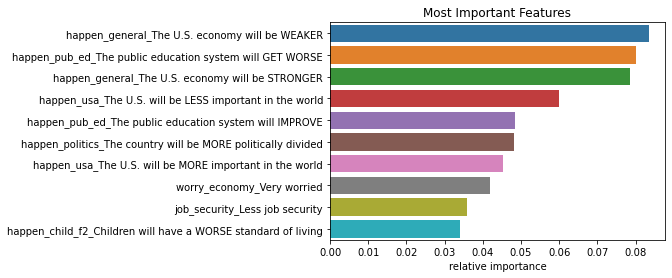

In [54]:
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:10], y=feature_importances.index[0:10]).set(title="Most Important Features")

## Modeling with just top 50 features

In [30]:
top_fifty = feature_importances[0:51].index.to_list()

In [31]:
X_train_top_fifty = o.X_train_dummies[top_fifty]
X_validate_top_fifty = o.X_validate_dummies[top_fifty]
X_validate_top_fifty = o.X_validate_dummies[top_fifty]

In [32]:
forest_list, forest_name_list = random_forest_models(10, 10, 'fifty')

In [33]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = test_a_model(X_train_top_fifty, o.y_train_dummies, X_validate_top_fifty, o.y_validate_dummies, model, name, score_df)

In [34]:
score_df.sort_values(by= "validate_score", ascending = False)

,model_name,train_score,validate_score
51,including_all_features_random_forest_min_sampl...,0.853693,0.796358
11,including_all_features_random_forest_min_sampl...,0.818182,0.794702
131,fifty_features_random_forest_min_samples_leaf_...,0.813210,0.793046
93,fifty_features_random_forest_min_samples_leaf_...,0.835227,0.793046
135,fifty_features_random_forest_min_samples_leaf_...,0.772017,0.793046
...,...,...,...
74,k_nearest_neighbors_9,0.602983,0.521523
71,k_nearest_neighbors_6,0.625710,0.521523
70,k_nearest_neighbors_5,0.629972,0.509934
73,k_nearest_neighbors_8,0.612216,0.508278


### Modeling with just top 30 features

In [35]:
top_thirty = feature_importances[0:31].index.to_list()

In [36]:
X_train_top_thirty = o.X_train_dummies[top_thirty]
X_validate_top_thirty = o.X_validate_dummies[top_thirty]
X_validate_top_thirty = o.X_validate_dummies[top_thirty]

In [37]:
forest_list, forest_name_list = random_forest_models(10, 10, 'thirty')

In [38]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = test_a_model(X_train_top_thirty, o.y_train_dummies, X_validate_top_thirty, o.y_validate_dummies, model, name, score_df)

In [39]:
score_df.sort_values(by = "validate_score", ascending = False)

,model_name,train_score,validate_score
151,thirty_features_random_forest_min_samples_leaf...,0.750710,0.798013
51,including_all_features_random_forest_min_sampl...,0.853693,0.796358
11,including_all_features_random_forest_min_sampl...,0.818182,0.794702
93,fifty_features_random_forest_min_samples_leaf_...,0.835227,0.793046
15,including_all_features_random_forest_min_sampl...,0.916193,0.793046
...,...,...,...
71,k_nearest_neighbors_6,0.625710,0.521523
74,k_nearest_neighbors_9,0.602983,0.521523
70,k_nearest_neighbors_5,0.629972,0.509934
73,k_nearest_neighbors_8,0.612216,0.508278


### Modeling with just 40 features

In [48]:
top_forty = feature_importances[0:40].index.to_list()

In [49]:
X_train_top_forty = o.X_train_dummies[top_forty]
X_validate_top_forty = o.X_validate_dummies[top_forty]
X_validate_top_forty = o.X_validate_dummies[top_forty]

In [50]:
forest_list, forest_name_list = random_forest_models(10, 10, 'forty')

In [51]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = test_a_model(X_train_top_thirty, o.y_train_dummies, X_validate_top_thirty, o.y_validate_dummies, model, name, score_df)

In [57]:
score_df.sort_values(by = "validate_score", ascending = False).head(20)

,model_name,train_score,validate_score
151,thirty_features_random_forest_min_samples_leaf...,0.750710,0.798013
51,including_all_features_random_forest_min_sampl...,0.853693,0.796358
242,thirty_features_random_forest_min_samples_leaf...,0.761364,0.796358
296,forty_features_random_forest_min_samples_leaf_...,0.765625,0.794702
11,including_all_features_random_forest_min_sampl...,0.818182,0.794702
277,forty_features_random_forest_min_samples_leaf_...,0.749290,0.794702
131,fifty_features_random_forest_min_samples_leaf_...,0.813210,0.793046
197,thirty_features_random_forest_min_samples_leaf...,0.764205,0.793046
325,forty_features_random_forest_min_samples_leaf_...,0.780540,0.793046
39,including_all_features_random_forest_min_sampl...,0.831676,0.793046


### Compare All Models

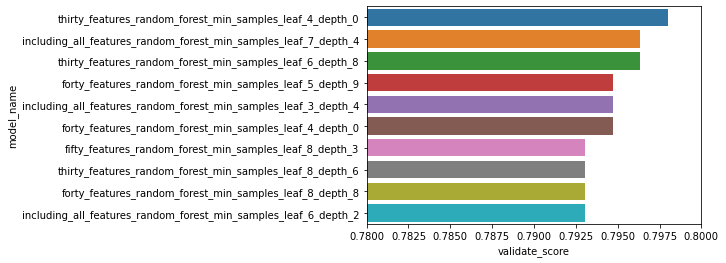

In [73]:
best_models = sns.barplot(y = "model_name", x = 'validate_score', data = score_df.sort_values(by = "validate_score", ascending = False).head(10))
limits = best_models.set(xlim=(0.78, 0.80))

## Run Model on Test

In [65]:
rf_depth_4_leaf_7 = RandomForestClassifier(min_samples_leaf = 7, max_depth = 4)

In [68]:
rf_depth_4_leaf_7.fit(o.X_train_dummies, o.y_train_dummies)

RandomForestClassifier(max_depth=4, min_samples_leaf=7)

In [69]:
test_predictions = rf_depth_4_leaf_7.predict(o.X_test_dummies)

In [56]:
classification_report_test = pd.DataFrame(classification_report(o.y_test_dummies, test_predictions, output_dict = True)).T
classification_report_test

,precision,recall,f1-score,support
0,0.752351,0.854093,0.800000,281.000000
1,0.777174,0.644144,0.704433,222.000000
accuracy,0.761431,0.761431,0.761431,0.761431
macro avg,0.764763,0.749118,0.752217,503.000000
weighted avg,0.763307,0.761431,0.757822,503.000000


Our best performing model is 76% acurate on the test data. 